# <Instacart 데이터 분석 기반의 마케팅 전략 제안>

## - Instacart Market Basket Analysis 데이터 활용
### (https://www.kaggle.com/c/instacart-market-basket-analysis)
### TEAM 3SHOT: 김예진, 김연수, 양희성


---



# 3. Dataset

# Orders

In [ ]:
# 구글 코랩에 필요한 위치 불러오기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# 파일들 불러오기
order_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/orders.csv/orders.csv')
aisles_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/aisles.csv/aisles.csv')
products_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/products.csv/products.csv')
dep_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/departments.csv/departments.csv')
opp_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv')
opt_df = pd.read_csv('/content/drive/MyDrive/3shot/instacart-market-basket-analysis/order_products__train.csv/order_products__train.csv')

In [ ]:
# 빠르게 데이터셋 훑어보기
order_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


- order_id: order identifier
- user_id: customer identifier
- eval_set: which evaluation set this order belongs in - (see SET described below)
- order_number: the order sequence number for this user (1 = first, n = nth)
- order_dow: the day of the week the order was placed on
- order_hour_of_day: the hour of the day the order was placed on
- days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

- order_id : 주문 번호
- user_id : 고객 식별번호
- eval_set :  주문이 어떤 set에 속하는지(prior, train, test)
- order_number : 주문번호, 한 유저가 연속으로 몇개를 주문했는지 보여준다
- order_dow : 주문이 발생된 요일
- order_hour_of_day : 주문이 발생된 시간
- days_since_prior : 마지막 주문으로부터 얼마나 지났는지(최대 한도는 30일)

--- 

# Aisles

In [ ]:
# 빠르게 데이터셋 훑어보기
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
aisles_df.shape

(134, 2)

---

# Products

In [ ]:
# 빠르게 데이터셋 훑어보기
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
products_df.shape

(49688, 4)

- product_id: product identifier
- product_name: name of the product
- aisle_id: foreign key
- department_id: foreign key

- product_id : 상품 식별자
- product_name : 상품명
- aisle_id : 외래키
- department_id : 외래키

---

# Departments

In [ ]:
# 빠르게 데이터셋 훑어보기
dep_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
dep_df.shape

(21, 2)

In [ ]:
dep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


- department_id: department identifier
- department: the name of the department

- department_id: 대분류 식별자
- department: 대분류 명

---

# Order_products_prior

In [ ]:
# 빠르게 데이터셋 훑어보기
opp_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
opp_df.shape

(32434489, 4)

In [ ]:
opp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


- order_id: foreign key
- product_id: foreign key
- add_to_cart_order: order in which each product was added to cart
- reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

- order_id: 외래 키
- product_id: 외래 키
- add_to_cart_order: 각 상품이 카트에 들어간 주문 순서(장바구니 순서)
- reordered: 과거 주문 이력이 있으면 1, 아니면 0

---

# Order_products_train

In [ ]:
# 빠르게 데이터셋 훑어보기
opt_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
opt_df.shape

(1384617, 4)

In [ ]:
opt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


- order_id: foreign key
- product_id: foreign key
- add_to_cart_order: order in which each product was added to cart
- reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

- order_id: 외래 키
- product_id: 외래 키
- add_to_cart_order: 각 상품이 카트에 들어간 주문
- reordered: 과거 주문 이력이 있으면 1, 아니면 0

# Merge

In [ ]:
# product, aisles, departments 병합한 df
# merging products and aisles df based on product id
temp1 = pd.merge(left=products_df, right=aisles_df, how='left')
# merging products and departments df based on product id
temp1 = pd.merge(left=temp1, right=dep_df, how='left')
temp1

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [ ]:
# train 데이터 빼고 전체 데이터 병합한 df
# merging order prior and temp1 based on prior
temp2 = pd.merge(left=opp_df, right=temp1, how='left')
# merging order prior and orders df based on prior
temp2 = pd.merge(left=temp2, right=order_df, how='left')
temp2

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household,25247,prior,24,2,6,21.0
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks,25247,prior,24,2,6,21.0
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen,25247,prior,24,2,6,21.0
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce,25247,prior,24,2,6,21.0


In [ ]:
# 총 병합 테이블에서 필요 없는 컬럼 제거 후 사용할 df
# user_id, order_id, department, aisles, prod_name, add_to_cart_order, reordered, days_since_prior_order, order_dow, order_hour_of_day < - temp 3
# 지울 열: eval_set, aisle_id, department_id
temp3 = temp2[['user_id', 'order_id', 'department', 'aisle', 'product_name', 'order_number', 'add_to_cart_order', 'reordered', 'days_since_prior_order', 'order_dow', 'order_hour_of_day']]
temp3

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered,days_since_prior_order,order_dow,order_hour_of_day
0,202279,2,dairy eggs,eggs,Organic Egg Whites,3,1,1,8.0,5,9
1,202279,2,produce,fresh vegetables,Michigan Organic Kale,3,2,1,8.0,5,9
2,202279,2,pantry,spices seasonings,Garlic Powder,3,3,0,8.0,5,9
3,202279,2,pantry,oils vinegars,Coconut Butter,3,4,1,8.0,5,9
4,202279,2,pantry,baking ingredients,Natural Sweetener,3,5,0,8.0,5,9
...,...,...,...,...,...,...,...,...,...,...,...
32434484,25247,3421083,household,dish detergents,Free & Clear Natural Dishwasher Detergent,24,6,1,21.0,2,6
32434485,25247,3421083,snacks,crackers,Organic Mini Sandwich Crackers Peanut Butter,24,7,0,21.0,2,6
32434486,25247,3421083,frozen,frozen breakfast,All Natural French Toast Sticks,24,8,0,21.0,2,6
32434487,25247,3421083,produce,fresh fruits,Banana,24,9,1,21.0,2,6


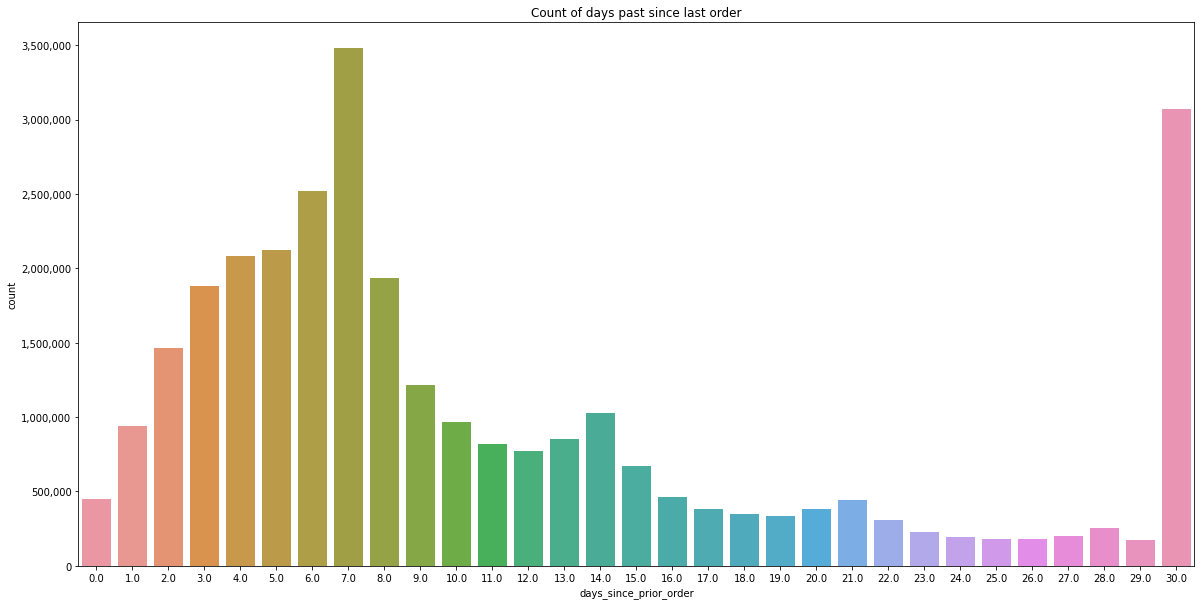

In [ ]:
# 전체 고객 재주문에 걸린 날짜
plt.figure(figsize=(20,10))
plt.title('Count of days past since last order')
sns.countplot(data=temp3, x='days_since_prior_order')
cur_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.show()

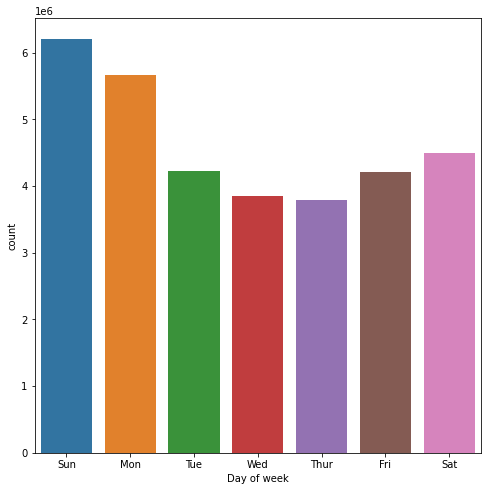

In [ ]:
# 어느 요일에 구매가 많이 이루어졌는지를 확인
plt.figure(figsize=(8,8))
sns.countplot(data=temp3, x='order_dow')
plt.xlabel('Day of week')
plt.xticks([0,1,2,3,4,5,6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
plt.show()
# 0과 1, 즉 일 & 월에 구매가 가장 많다. (+ 희성님 참고자료 첨부: 온라인 쇼핑 특징)

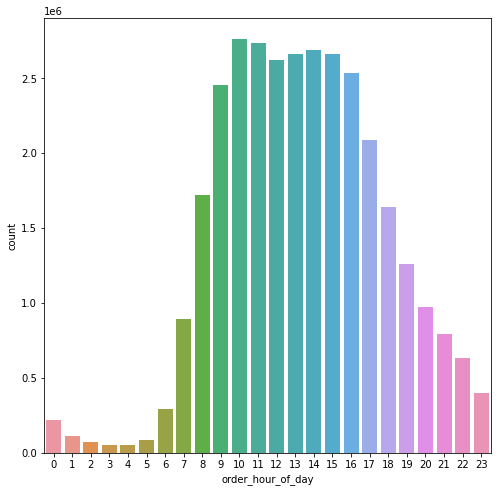

In [ ]:
# 어느 시간대에 구매가 많이 이루어졌는지 확인
plt.figure(figsize=(8,8))
sns.countplot(data=temp3, x='order_hour_of_day')
# 오전 7시부터 급격히 상승하여 오전 10시에 peak, 낮 12시에 약간 감소하다가 다시 상승하고, 16시 경부터 급격히 하락하기 시작
# 9 ~ 16시 사이에 가장 많은 구매가 이루어진다는 것을 알 수 있다
# 온라인 쇼핑의 특징일 수 있음

In [ ]:
# 시간&요일별 pivot table 만들기
hod_dow_pt = pd.pivot_table(temp3, values='order_number', aggfunc='count', index=['order_dow'], columns=['order_hour_of_day'])
hod_dow_pt

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,38876,22523,12725,8851,8372,11631,34987,133394,306499,441291,...,564896,552066,501608,395706,284521,217348,183830,153142,120829,71000
1,37114,18296,10817,7114,7673,14422,52778,165442,333337,506145,...,453192,442884,418567,337898,259447,199124,152130,119965,91849,57272
2,29914,14711,8339,7026,6802,12749,43816,122480,224049,329222,...,335112,334071,330935,277631,226826,170807,130896,102845,80319,52617
3,27525,13563,8666,5777,6840,11739,40952,110704,198423,278169,...,304323,314270,306396,261109,213278,164340,122269,100592,81471,50179
4,24719,13530,7979,6330,6923,12009,39837,113505,194150,270028,...,296995,299368,298254,254090,207526,169011,130612,108393,89471,54667
5,29520,14962,9518,8325,8738,14731,46289,128870,224154,315025,...,345980,343146,327197,270656,217743,166974,126001,99214,78852,54041
6,31280,18201,11390,7898,7935,10781,32136,117542,239361,316833,...,391050,378728,354501,292375,228582,171797,131300,112219,91943,62844


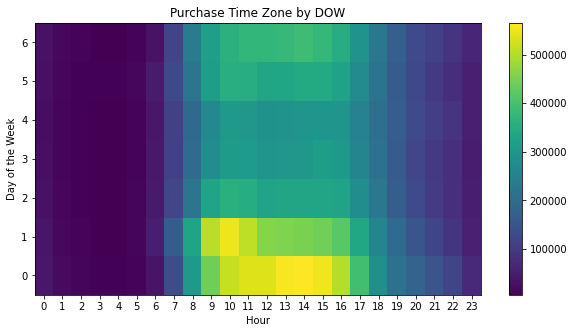

In [ ]:
# 시간&요일별 히트맵 그리기
# 참고: https://noodle.tistory.com/15
plt.figure(figsize=(10,5))
plt.pcolor(hod_dow_pt)
plt.xticks(np.arange(0.5,len(hod_dow_pt.columns),1),hod_dow_pt.columns)
plt.yticks(np.arange(0.5,len(hod_dow_pt.index),1),hod_dow_pt.index)
plt.title('Purchase Time Zone by DOW')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.colorbar()
plt.show()

# 일요일 낮(13-15) & 월요일 오전(9-11)에 구매량이 높은 편임을 알 수 있다
# 금-토 여가를 즐긴 후, 가정에서 휴식을 취할 때 / 월요일 아침 출근 후 구매가 많이 발생한다고 유추할 수 있다

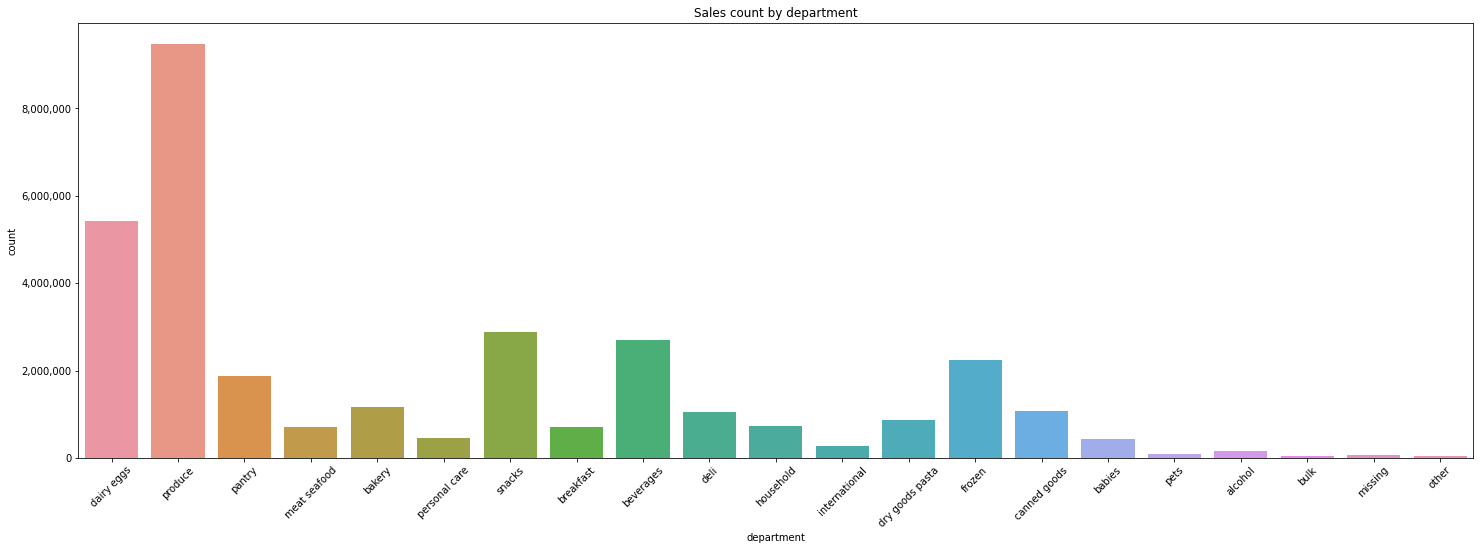

In [ ]:
# 대분류별 세일 수
plt.figure(figsize=(25,8))
plt.title('Sales count by department')
sns.countplot(data=temp3, x='department')
cur_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.xticks(rotation=45)
plt.show()

### Reordered 기준으로 전체 데이터 정리

In [ ]:
# 재구매비율이 얼마나 되는지 확인
temp3_reordered = pd.DataFrame(temp3['reordered'])
temp3_reordered

,reordered
0,1
1,1
2,0
3,1
4,0
...,...
32434484,1
32434485,0
32434486,0
32434487,1


In [ ]:
temp3_reordered.value_counts()
# 재구매: 19,126,536건
# 첫 구매: 13,307,953건

reordered
1            19126536
0            13307953
dtype: int64

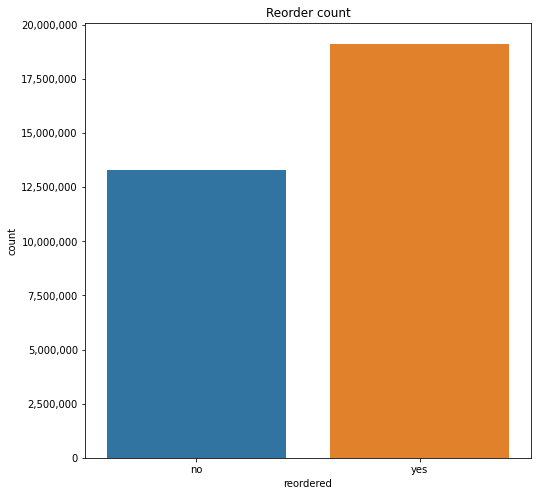

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(data=temp3, x='reordered')
plt.title('Reorder count')
plt.xticks([0, 1], ['no', 'yes'])
cur_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.show()
# 재구매가 첫 구매에 비해서 높다
# 기존 구매 고객층(특히 vip)을 굳건히 할 필요성의 근거

In [ ]:
# 전체 대분류별 reorder 테이블
temp_data_prod = pd.DataFrame(temp3['reordered'].groupby(temp3['department']).count())
temp_data_prod = temp_data_prod.sort_values(by='reordered',ascending=False)
temp_data_prod

,reordered
department,
produce,9479291
dairy eggs,5414016
snacks,2887550
beverages,2690129
frozen,2236432
pantry,1875577
bakery,1176787
canned goods,1068058
deli,1051249


In [ ]:
# reorder에 대분류별 카운트
temp_prod_data = pd.DataFrame(temp3['reordered'].groupby(temp3['department']).count())
temp_prod_data.index = temp_prod_data.index.tolist()
temp_prod_data = temp_prod_data.reset_index()
temp_prod_data = temp_prod_data.rename(columns = {'index' : 'department'})
temp_prod_data = temp_prod_data.sort_values(by='reordered',ascending =False)
temp_prod_data

,department,reordered
19,produce,9479291
7,dairy eggs,5414016
20,snacks,2887550
3,beverages,2690129
10,frozen,2236432
16,pantry,1875577
2,bakery,1176787
6,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


In [ ]:
# 전체 소분류별 reorder 테이블
temp_data_aisle = pd.DataFrame(temp3['reordered'].groupby(temp3['aisle']).count())
temp_data_aisle = temp_data_aisle.sort_values(by='reordered',ascending =False)
temp_data_aisle

,reordered
aisle,
fresh fruits,3642188
fresh vegetables,3418021
packaged vegetables fruits,1765313
yogurt,1452343
packaged cheese,979763
...,...
eye ear care,8974
baby bath body care,8581
baby accessories,8160


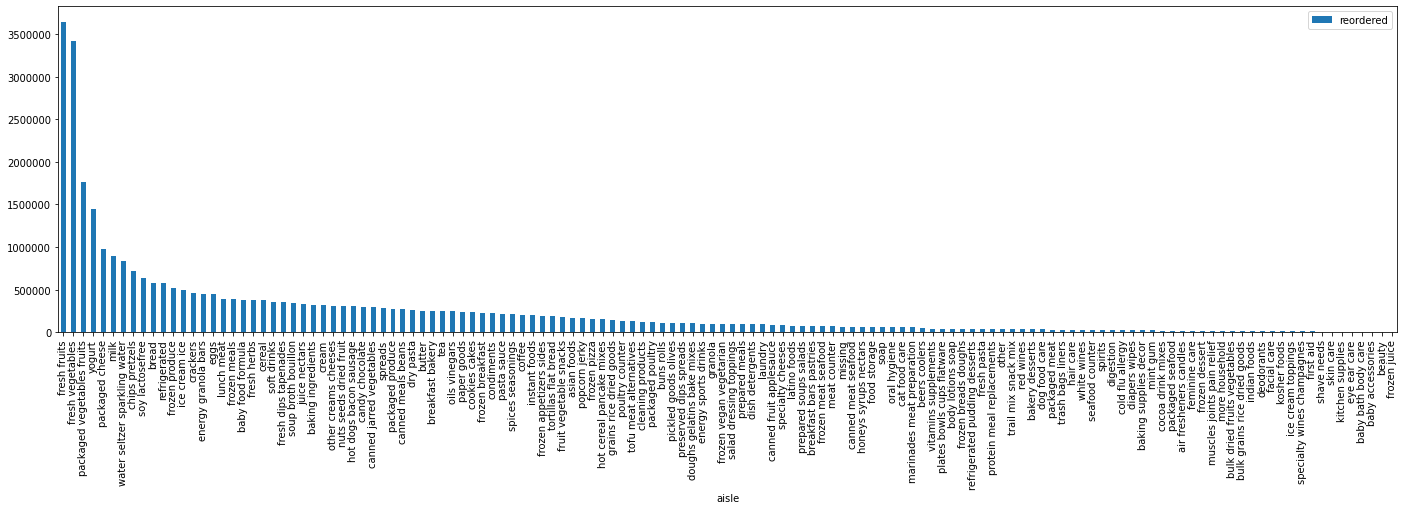

In [ ]:
# 전체 소분류별 reorder 그래프
temp_data_aisle.plot.bar(y='reordered',figsize=(24,6))
plt.ticklabel_format(axis='y',  style = 'plain')
plt.show()



---



우리 회사(Instacart)는 다양한 마켓을 연결하여 고객에게 상품을 제공하는 온라인 쇼핑몰이다. <br>
우리 회사는 직접 상품을 판매하는 회사가 아니므로, 거래 시 발생하는 수수료를 통해 매출을 증대해야 한다. <br>
따라서 한 번에 많은 양을 구입하는 고객보다는, 적게 구매하더라도 자주 구매하는 고객들이 우리의 VIP 고객들이다. <br>
VIP 고객들의 구매패턴을 파악하기 위해 VIP 고객 데이터를 설정하고 분석하였다.
<br>

## VIP 추출

In [ ]:
# VIP를 가려내기 위해 user_id별로 오더 건수를 세봤다
temp3.groupby('user_id').count()['order_id']

user_id
1          59
2         195
3          88
4          18
5          37
         ... 
206205     32
206206    285
206207    223
206208    677
206209    129
Name: order_id, Length: 206209, dtype: int64

In [ ]:
# 고객별로 주문한 횟수 order_number로 확인가능
# 조금 더 빠른 VIP확인을 위해 prior df말고 더 작은 orders df을 사용했다.
# 필터링 조건이 prior data 그리고 user_id별 카운트
order_number_count = order_df[order_df['eval_set']=='prior'].groupby(['user_id']).count()
order_number_count

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,10,10,10,10,10,9
2,14,14,14,14,14,13
3,12,12,12,12,12,11
4,5,5,5,5,5,4
5,4,4,4,4,4,3
...,...,...,...,...,...,...
206205,3,3,3,3,3,2
206206,67,67,67,67,67,66
206207,16,16,16,16,16,15


In [ ]:
# 통계치 숫자로 확인
# order_number 칼럼을 보면 전체 고객 수는 206209명이고
# 최소 주문 수는 3, 최대 주문 수는 99이다
order_number_count.describe()

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000
mean,15.590367,15.590367,15.590367,15.590367,15.590367,14.590367
std,16.654774,16.654774,16.654774,16.654774,16.654774,16.654774
min,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
50%,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000
75%,19.000000,19.000000,19.000000,19.000000,19.000000,18.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000


In [ ]:
# 유저 id별 오더 수를 세어봄
order_number_count['order_number']

user_id
1         10
2         14
3         12
4          5
5          4
          ..
206205     3
206206    67
206207    16
206208    49
206209    13
Name: order_number, Length: 206209, dtype: int64

자주 산다: order number 숫자가 높다는 의미 <BR>
이를 확인하기 위해서 boxplot으로 확인해보았다

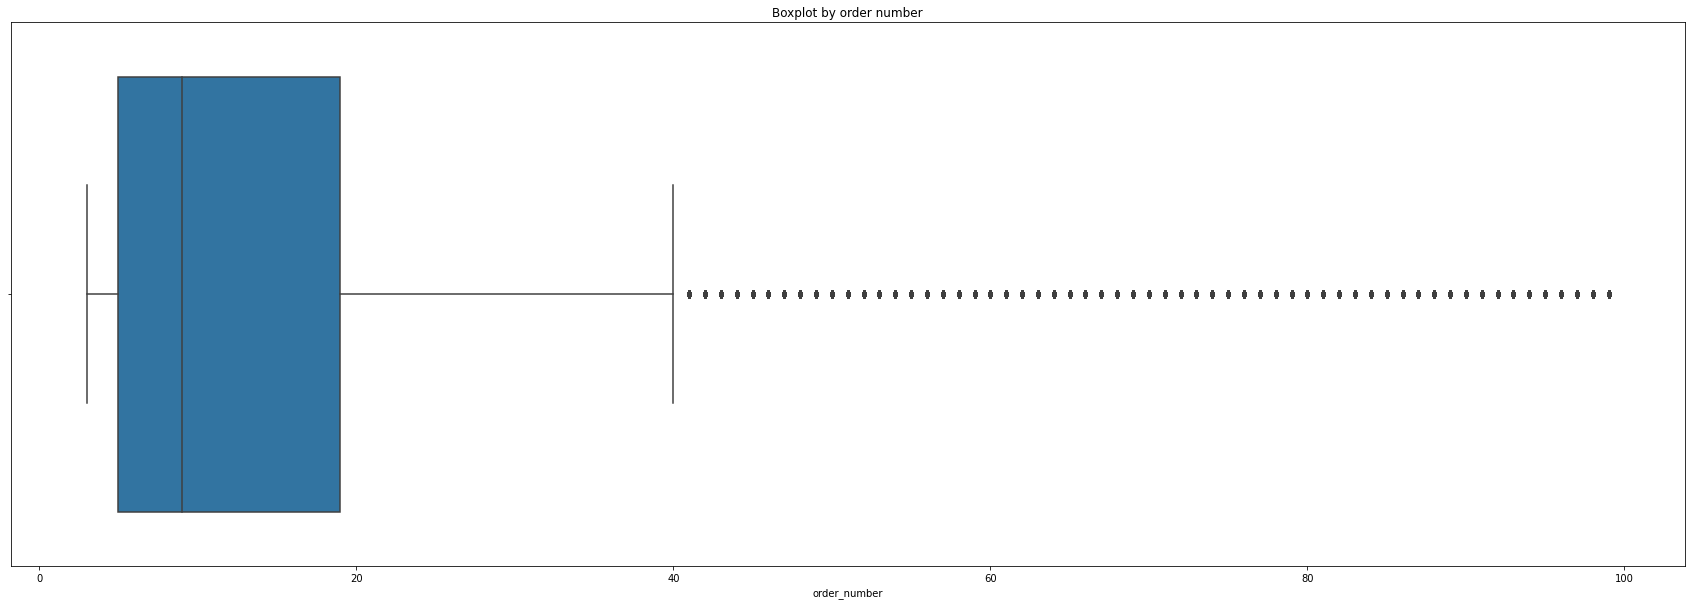

In [ ]:
# 박스플롯으로 백분위수를 시각화함과 동시에 이상치를 확인하려고 그렸다.
# 여기서 order_number 40 이상이 이상치로 발견
# 그래서 이상치가 몇명인지 궁금해서 확인해보기로 했다.
plt.figure(figsize=(30,10))
plt.title('Boxplot by order number')
sns.boxplot(data=order_number_count, x='order_number')

In [ ]:
# 가설: order_number가 40번 이상인 고객들이 VIP다
order_number_vip = order_number_count[order_number_count['order_number'] >= 40]
order_number_vip

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
17,40,40,40,40,40,39
27,81,81,81,81,81,80
50,67,67,67,67,67,66
54,77,77,77,77,77,76
90,71,71,71,71,71,70
...,...,...,...,...,...,...
206158,50,50,50,50,50,49
206174,52,52,52,52,52,51
206193,41,41,41,41,41,40


In [ ]:
# VIP 아닌 고객들 수를 알아야 비율을 계산하기 쉽다
order_number_normal = order_number_count[order_number_count['order_number'] < 40]
order_number_normal

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
user_id,,,,,,
1,10,10,10,10,10,9
2,14,14,14,14,14,13
3,12,12,12,12,12,11
4,5,5,5,5,5,4
5,4,4,4,4,4,3
...,...,...,...,...,...,...
206203,5,5,5,5,5,4
206204,4,4,4,4,4,3
206205,3,3,3,3,3,2


In [ ]:
order_number_normal.describe()

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,188307.000000,188307.000000,188307.000000,188307.000000,188307.000000,188307.000000
mean,11.443563,11.443563,11.443563,11.443563,11.443563,10.443563
std,8.713417,8.713417,8.713417,8.713417,8.713417,8.713417
min,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000
75%,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000
max,39.000000,39.000000,39.000000,39.000000,39.000000,38.000000


In [ ]:
# 이 가설을 prior 데이터셋에 적용시켜보았다 
# 40번 이상 구매한 고객들의 구매한 제품 건수
temp4 = temp3[temp3['order_number'] >=40]
temp4

,user_id,order_id,department,aisle,product_name,order_number,add_to_cart_order,reordered,days_since_prior_order,order_dow,order_hour_of_day
30,156122,5,produce,fresh fruits,Bag of Organic Bananas,42,1,1,9.0,6,16
31,156122,5,pantry,salad dressing toppings,"Just Crisp, Parmesan",42,2,1,9.0,6,16
32,156122,5,deli,prepared soups salads,Fresh Fruit Salad,42,3,1,9.0,6,16
33,156122,5,produce,packaged vegetables fruits,Organic Raspberries,42,4,1,9.0,6,16
34,156122,5,dairy eggs,milk,2% Reduced Fat Milk,42,5,1,9.0,6,16
...,...,...,...,...,...,...,...,...,...,...,...
32434398,119835,3421069,produce,fresh fruits,Organic Strawberries,75,8,1,2.0,3,13
32434399,119835,3421069,produce,fresh vegetables,Organic Cucumber,75,9,1,2.0,3,13
32434400,119835,3421069,produce,fresh vegetables,Organic Red Potato,75,10,1,2.0,3,13
32434401,119835,3421069,produce,fresh vegetables,Organic Large Green Asparagus,75,11,1,2.0,3,13


# RFM 기법

orders 파일로 vip고객 분석 
- orders의 unique한 user_id 확인 : 206209
- RFM기법을 통한 VIP 고객 분석 : Monetary는 해당사항 없음 = order-id와 동일 value
  - 기준 : user_id (orders.groupby(['user_id'])
  - 최신성(Recency)  : 'days_since_prior_order':'min'
  - 빈번함(Frequency): 'order_id': 'count'
  - 화폐적(Monetary) : 해당사항 없음 , 'order_number': 'count' 지정
- RFM현상 
  - Recency(평균:5.8,편차:6.84) , Frequency(평균:16,편차:16),
  - Frequency BOX PLOT에서 이상치 발견 : 40개 이상 --> 검사 필요  
- USER별 RFM점수 산정 후 산포도 작성  
  - RFM CLASS 만들시 CLASS 범위 조정하면 VIP수 변경 됨 
     -> DATA NODE 교육시 99% 이상을 1CLASS로 함 .. <br> 여기서는 95%, 91.4%면 해당고객 나옴

In [ ]:
orders[(orders['user_id']==1)]


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
len(orders['user_id'].unique())  #206209고객수

206209

In [ ]:
# orders df prior만 필터링
orders = orders[orders['eval_set']=='prior']

In [ ]:
# fee($3.99) * order number =  profit으로 추가
fee = 3.99
orders['profit'] = fee * orders['order_number']
orders.tail(50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,profit
3421031,3097121,206208,prior,13,3,19,6.0,51.87
3421032,1569416,206208,prior,14,3,15,7.0,55.86
3421033,1949208,206208,prior,15,2,14,6.0,59.85
3421034,3049681,206208,prior,16,2,15,7.0,63.84
3421035,11859,206208,prior,17,1,13,6.0,67.83
3421036,447879,206208,prior,18,3,23,9.0,71.82
3421037,2467456,206208,prior,19,4,13,15.0,75.81
3421038,842771,206208,prior,20,0,8,10.0,79.80
3421039,2471606,206208,prior,21,5,9,5.0,83.79
3421040,2922221,206208,prior,22,1,12,3.0,87.78


In [ ]:
#고객별로 분석함 = user_id 당 
RFM_data = orders.groupby(['user_id']).agg({'days_since_prior_order':'min','order_number': 'count', 'profit': 'max'})
# RFM_data의 열 값을 각각 Recency, Frequency, Monetary로 변경
RFM_data.columns = ['Recency', 'Frequency', 'Monetary']
RFM_data.head()

,Recency,Frequency,Monetary
user_id,,,
1,0.0,10,39.90
2,3.0,14,55.86
3,7.0,12,47.88
4,0.0,5,19.95
5,10.0,4,15.96


In [ ]:
# 구매간격(평균:5.8,편차:6.84) , 구매건수(평균:16,편차:16), 오더건수((평균:16,편차:16) ) , 구매건수와 카트품목은 동일 맞음
RFM_data.describe()

,Recency,Frequency,Monetary
count,206209.000000,206209.000000,206209.000000
mean,6.472317,15.590367,62.205565
std,7.578506,16.654774,66.452546
min,0.000000,3.000000,11.970000
25%,1.000000,5.000000,19.950000
50%,4.000000,9.000000,35.910000
75%,8.000000,19.000000,75.810000
max,30.000000,99.000000,395.010000


In [ ]:
# RFM_data의 Frequency 값을 내림차순(높은값에서 낮은 값 순서로)으로 정렬

temp_var = RFM_data.sort_values(by = ['Frequency'], ascending = False)
temp_var.head()

,Recency,Frequency,Monetary
user_id,,,
152340,0.0,99,395.01
185641,0.0,99,395.01
185524,0.0,99,395.01
81678,0.0,99,395.01
70922,0.0,99,395.01


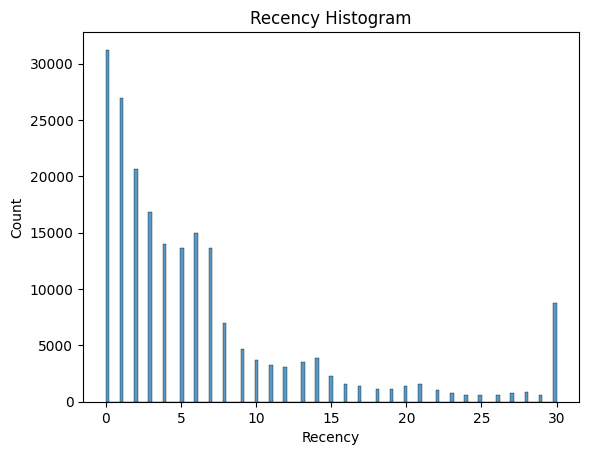

In [ ]:
# RFM_data의 Recency열 값을 상자도표(Box Plot)으로 시각화
# RFM_data의 Recency열 값을 히스토그램으로 시각화
ax = sns.histplot(data= RFM_data['Recency'])
plt.title('Recency Histogram')
plt.show()
#구매간격 : 작은 값이 중요, 0 ~ 7일 사이 고객 중요.. 그런데 많다 .. 이상하다 

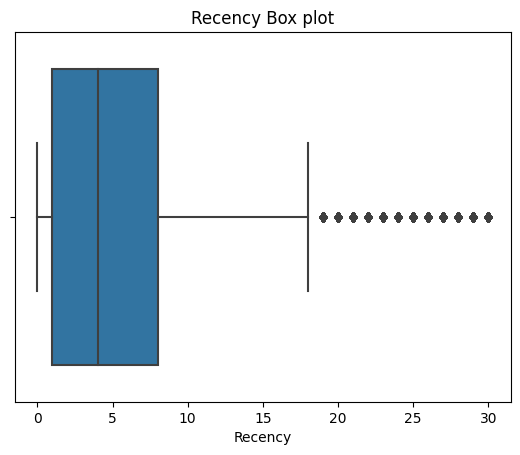

In [ ]:
# RFM_data의 Recency열 값을 상자도표(Box Plot)으로 시각화
ax = sns.boxplot(data=temp_var, x='Recency')
plt.title('Recency Box plot')
plt.show()

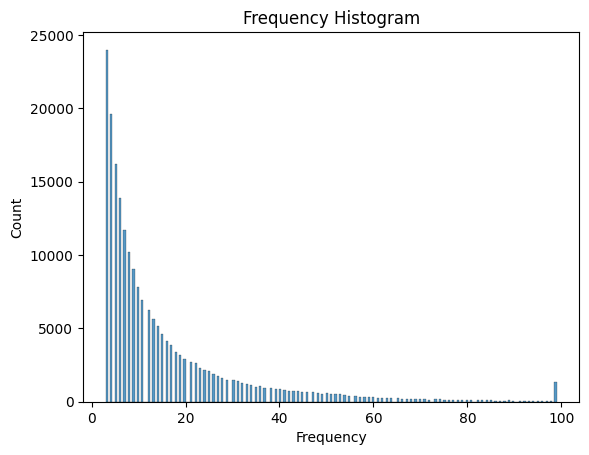

In [ ]:
# RFM_data의 Frequency 값을 상자도표(Box Plot)으로 시각화
# RFM_data의 Frequency 값을 히스토그램으로 시각화
ax = sns.histplot(data= RFM_data['Frequency'])
plt.title('Frequency Histogram')
plt.show()
#구매빈도수는 높은 값이 중요 

Frequency boxplot에서 앞에서 살펴본 것과 같이, 40이상에서 이상치가 뜬다!

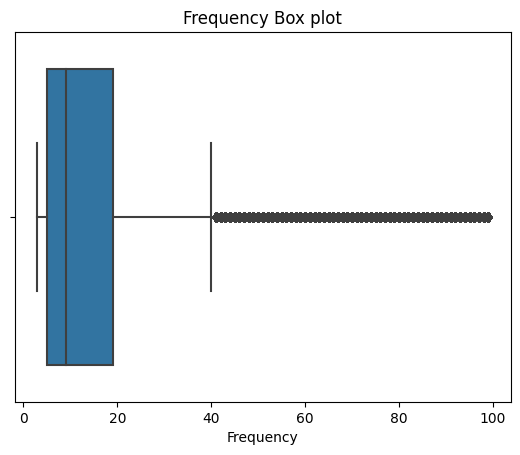

In [ ]:
# RFM_data의 Recency열 값을 상자도표(Box Plot)으로 시각화
ax = sns.boxplot(data=temp_var, x='Frequency')
plt.title('Frequency Box plot')
plt.show()


In [ ]:
# RFM_data의 Frequency 값을 내림차순(높은값에서 낮은 값 순서로)으로 정렬

temp_var = RFM_data.sort_values(by = ['Frequency'], ascending = False)
temp_var.head()

,Recency,Frequency,Monetary
user_id,,,
152340,0.0,99,395.01
185641,0.0,99,395.01
185524,0.0,99,395.01
81678,0.0,99,395.01
70922,0.0,99,395.01


In [ ]:
temp_var = RFM_data.sort_values(by = ['Monetary'], ascending=False)
temp_var.head()

,Recency,Frequency,Monetary
user_id,,,
152340,0.0,99,395.01
185641,0.0,99,395.01
185524,0.0,99,395.01
81678,0.0,99,395.01
70922,0.0,99,395.01


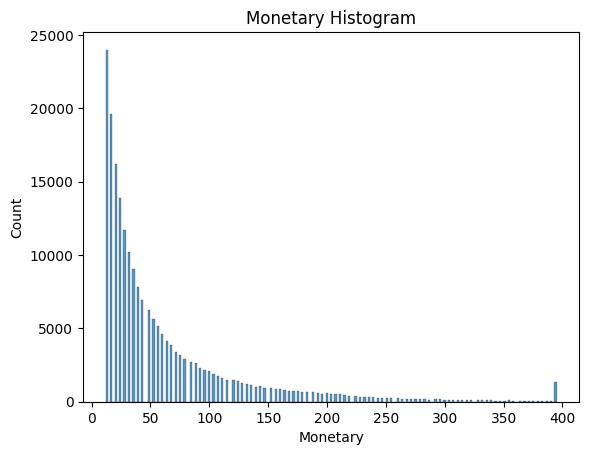

In [ ]:
# RFM_data의 Monetary 값을 상자도표(Box Plot)으로 시각화
# RFM_data의 Monetary 값을 히스토그램으로 시각화
ax = sns.histplot(data= RFM_data['Monetary'])
plt.title('Monetary Histogram')
plt.show()
# 높은 값이 중요 

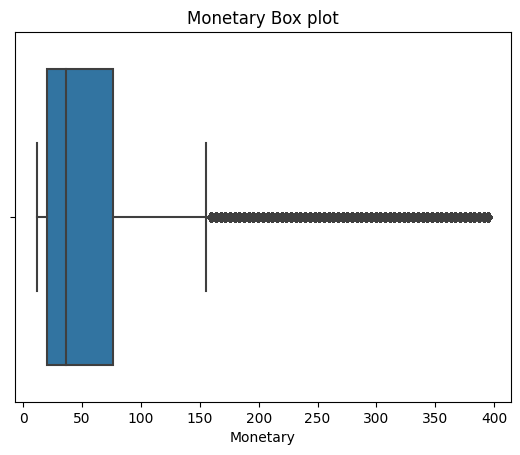

In [ ]:
# RFM_data의 Monetary 열 값을 상자도표(Box Plot)으로 시각화
ax = sns.boxplot(data=temp_var, x='Monetary')
plt.title('Monetary Box plot')
plt.show()

In [ ]:
#user_id별(user별) 점수로 환산
# RFM_data의 R_score열을 만들고, Recency열 값을 기준으로 1부터 100까지의 실수로 정규화합니다. 
RFM_data['R_score'] = np.interp(RFM_data['Recency'], (RFM_data['Recency'].min(), RFM_data['Recency'].max()), (100, 1)).round(2)
RFM_data['F_score'] = np.interp(RFM_data['Frequency'], (RFM_data['Frequency'].min(), RFM_data['Frequency'].max()), (1, 100)).round(2)
RFM_data['M_score'] = np.interp(RFM_data['Monetary'], (RFM_data['Monetary'].min(), RFM_data['Monetary'].max()), (1, 100)).round(2)

# 만들어진 RFM_data의 Head 값을 확인합니다. 
RFM_data.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score
user_id,,,,,,
1,0.0,10,39.90,100.0,8.22,8.22
2,3.0,14,55.86,90.1,12.34,12.34
3,7.0,12,47.88,76.9,10.28,10.28
4,0.0,5,19.95,100.0,3.06,3.06
5,10.0,4,15.96,67.0,2.03,2.03


In [ ]:
# 합산
RFM_data["RFM_score"] = ((RFM_data['R_score'] + RFM_data['F_score'] + RFM_data['M_score'])/3).round(2)

In [ ]:
# RFM_data에 Class열을 만들고, RFM_score와 지정한 분위값 범위에 따라 labels 값을 입력합니다 q값으로 클래스 조정 가능

RFM_data["Class"] = pd.qcut(RFM_data['RFM_score'], q=[0, 0.4, 0.6, 0.8, 0.92, 1], labels=[5,4,3,2,1])

In [ ]:
#class 별 user별 data 정리  .. 시각화 전처리
# Class가 입력된 RFM_data의 인덱스를 재정렬합니다.
RFM_data = RFM_data.reset_index()
RFM_data


,user_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Class
0,1,0.0,10,39.90,100.0,8.22,8.22,38.81,3
1,2,3.0,14,55.86,90.1,12.34,12.34,38.26,3
2,3,7.0,12,47.88,76.9,10.28,10.28,32.49,4
3,4,0.0,5,19.95,100.0,3.06,3.06,35.37,4
4,5,10.0,4,15.96,67.0,2.03,2.03,23.69,5
...,...,...,...,...,...,...,...,...,...
206204,206205,10.0,3,11.97,67.0,1.00,1.00,23.00,5
206205,206206,0.0,67,267.33,100.0,67.00,67.00,78.00,1
206206,206207,1.0,16,63.84,96.7,14.41,14.41,41.84,3
206207,206208,0.0,49,195.51,100.0,48.44,48.44,65.63,1


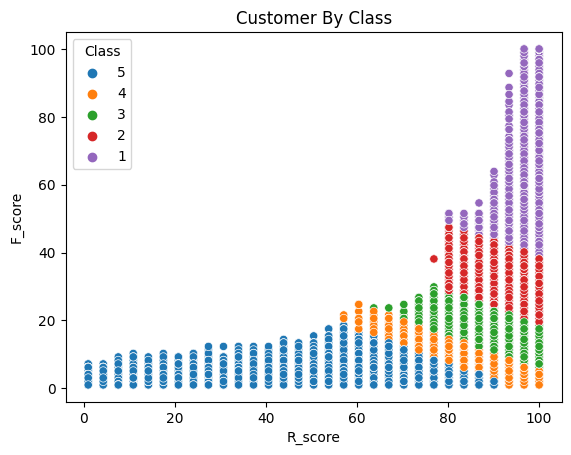

In [ ]:
# R_score와 M_score를 기준으로 산포도(scatter) 그리기
sns.scatterplot(data=RFM_data, x='R_score', y='F_score', hue='Class')
plt.title('Customer By Class')
plt.show()

class 1은 Recency와 Frequency가 모두 높은 사람들. 우리의 VIP 후보군에 해당한다. <br>
class 1의 데이터를 살펴보면, Frequency의 최솟값이 40임을 알 수 있다. <br>
앞서 Frequency의 boxplot에서 40에서부터 이상치로 나타나는 것을 확인했다.
>> 이 사람들은 order number >= 40 이상인 고객들이 맞구나!

In [ ]:
RFM_data[RFM_data['Class']==1].describe()

,user_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
count,16456.000000,16456.000000,16456.000000,16456.000000,16456.000000,16456.000000,16456.000000,16456.000000
mean,102658.107195,0.502370,60.793267,242.565135,98.342179,60.599480,60.599285,73.180283
std,59621.173834,0.767381,17.585059,70.164387,2.532356,18.134468,18.134369,12.339987
min,17.000000,0.000000,40.000000,159.600000,80.200000,39.160000,39.160000,59.160000
25%,50602.500000,0.000000,47.000000,187.530000,96.700000,46.380000,46.380000,63.430000
50%,102285.000000,0.000000,55.000000,219.450000,100.000000,54.620000,54.620000,69.060000
75%,153938.750000,1.000000,70.000000,279.300000,100.000000,70.090000,70.090000,80.060000
max,206208.000000,6.000000,99.000000,395.010000,100.000000,100.000000,100.000000,100.000000


In [ ]:
# RFM_data의 ID값을 Class열을 기준으로 집계.... vip 10285명
temp_var = RFM_data['user_id'].groupby(RFM_data['Class']).count()
temp_var


Class
5    83126
4    40726
3    41231
2    24670
1    16456
Name: user_id, dtype: int64

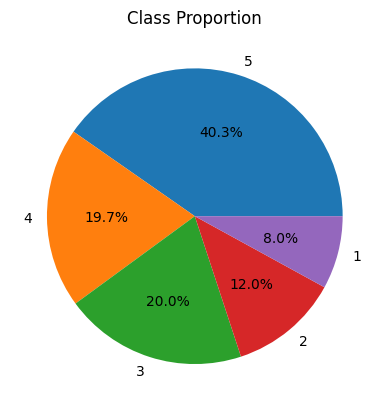

In [ ]:
# 집계 결과(VIP 등급별 고객 수)에 따른 파이그래프 그리기
plt.pie(temp_var, labels=temp_var.index, autopct = '%1.1f%%')
plt.title('Class Proportion')
plt.show()

In [ ]:
# RFM_data의 Class를 기준으로 Recency, Frequency, Monetary의 평균값 집계
temp_var = RFM_data.groupby('Class').agg({'Recency': 'mean', 'Frequency':'mean', 'Monetary':'mean'}).round(1)
temp_var

,Recency,Frequency,Monetary
Class,,,
5,12.9,5.3,21.1
4,3.4,8.9,35.4
3,2.1,16.2,64.6
2,1.3,30.3,120.9
1,0.5,60.8,242.6


In [ ]:
# 집계된 temp_var의 MultiIndex를 NormalIndex로 변환합니다. 
temp_var.index = temp_var.index.tolist()
temp_var

,Recency,Frequency,Monetary
5,12.9,5.3,21.1
4,3.4,8.9,35.4
3,2.1,16.2,64.6
2,1.3,30.3,120.9
1,0.5,60.8,242.6


In [ ]:
 #temp_var의 인덱스를 재정렬하고, 컬럼 이름을 Class로 변경합니다. 
temp_var = temp_var.reset_index()
temp_var = temp_var.rename(columns = {'index':'Class'})
temp_var

,Class,Recency,Frequency,Monetary
0,5,12.9,5.3,21.1
1,4,3.4,8.9,35.4
2,3,2.1,16.2,64.6
3,2,1.3,30.3,120.9
4,1,0.5,60.8,242.6


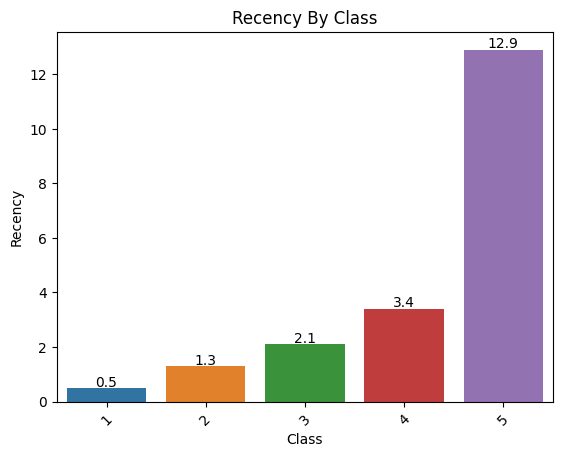

In [ ]:
# 각 Class별 평균 Recency 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Class', y='Recency')

for p in ax.patches:
  ax.annotate("%.1f" % p.get_height(),(p.get_x() + p.get_width()/2., p.get_height() - 0.3),
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=10, rotation=45)
  
plt.title('Recency By Class')
plt.show()

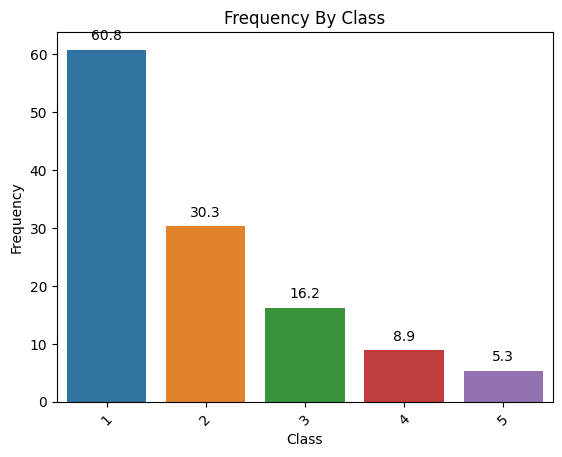

In [ ]:
# 각 Class별 평균 Frequency를 시각화합니다. 
ax = sns.barplot(data=temp_var, x='Class', y='Frequency')

for p in ax.patches:
  ax.annotate("%.1f" % p.get_height(),(p.get_x() + p.get_width()/2., p.get_height() - 0),
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=10, rotation=45)
  
plt.title('Frequency By Class')
plt.show()

In [ ]:
# 코드를 직접 작성해 보세요. 
# RFM_data의 Class값이 1인 행만 골라내서 VIP_customer 변수에 할당합니다. 
VIP_customer = RFM_data[RFM_data['Class'] == '1']

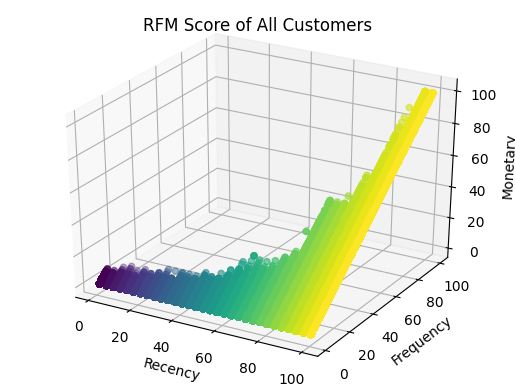

In [ ]:
# 필요한 라이브러리를 호출합니다. 
from mpl_toolkits.mplot3d import Axes3D

# 시각화를 위해 필요한 Figure와 ax를 정의합니다. 
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# x축, y축, z축에 각 데이터를 할당합니다. 
x = RFM_data['R_score']
y = RFM_data['F_score']
z = RFM_data['M_score']

# x축, y축, z축에 각 레이블을 부여합니다. . 
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# 산포도 형태의 3차원 시각화를 수행합니다. 
# 이때 색깔은 x축을 기준으로 합니다. 
ax = ax.scatter(x,y,z, c=x)

plt.title('RFM Score of All Customers')
plt.show()

order number 40이상인 사람들이 정말 VIP 고객일까? <br>
확인하기 위해서 이 고객들의 특징을 알아보자. (VIP 고객으로 가정)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


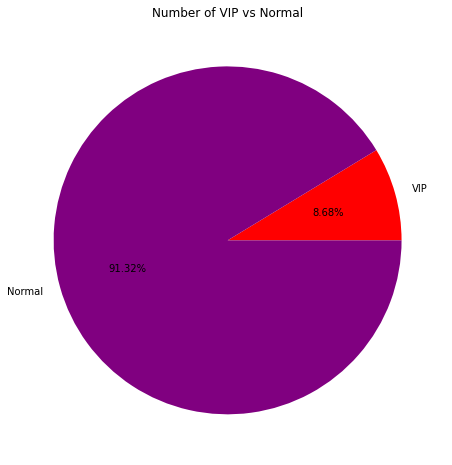

In [ ]:
# VIP 고객 수 비율 파이 그래프: 8.68%
# 전체 고객 수: 206209
# VIP 고객 수: 17902
# VIP 아닌 고객 수: 188307
vip_num = len(order_number_vip)
normal_num = len(order_number_count)-len(order_number_vip)

num_ppl_df = pd.DataFrame([vip_num, normal_num], index=['VIP', 'Normal'])

plt.figure(figsize=(8, 8))
plt.pie(num_ppl_df, labels=num_ppl_df.index, autopct='%.2f%%', colors=['red','purple'])
plt.title('Number of VIP vs Normal')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


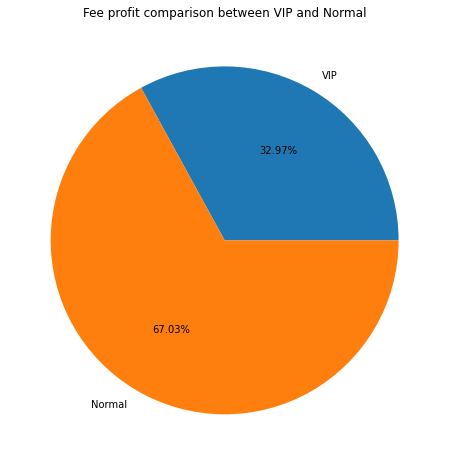

In [ ]:
# 가설확인: 전체 수수료 대비 VIP가 차지하는 비율: 8.68%의 고객이 32.97%의 매출을 올렸다
# instacart에 적힌 주문 당 배달 수수료는 $3.99이기에 직접 계산해보았다.
# VIP 수수료 매출: $4229284.29
# Normal 수수료 매출: $8598062.97
# 전체 수수료 매출: $12827347.260000002
fee = 3.99
vip_fee = fee * order_number_vip['order_number'].mean() * len(order_number_vip)
normal_fee = fee * order_number_normal['order_number'].mean() * (len(order_number_count)-len(order_number_vip))
total_fee = vip_fee + normal_fee

fee_df = pd.DataFrame([vip_fee, normal_fee], index=['VIP', 'Normal'])
fee_df
plt.figure(figsize=(8, 8))
plt.pie(fee_df, labels=fee_df.index, autopct='%.2f%%')
plt.title('Fee profit comparison between VIP and Normal')
plt.show()

order number 40이상인 사람들
- 전체 고객 수 대비 8.6% 차지
- 전체 매출 대비 33% 차지
고객 숫자에 비해서 차지하는 매출이 4배 가까이 되므로, <br>
해당 고객들을 우리의 VIP로 설정하겠다!

In [ ]:
# VIP 유저 id만 필요해서 추출
order_number_vip2 = order_number_vip.reset_index()
order_number_vip2 = order_number_vip2['user_id']
order_number_vip2

0            17
1            27
2            50
3            54
4            90
          ...  
17897    206158
17898    206174
17899    206193
17900    206206
17901    206208
Name: user_id, Length: 17902, dtype: int64

In [ ]:
# VIP만 추출한 df
vip_df = pd.merge(left=order_number_vip2, right=temp2, how='left')
vip_df

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,17,343199,7350,1,1,Natural Lime Flavor Sparkling Mineral Water,115,7,water seltzer sparkling water,beverages,prior,26,5,17,5.0
1,17,343199,18534,2,1,Grade A Extra Large Eggs,86,16,eggs,dairy eggs,prior,26,5,17,5.0
2,17,343199,17762,3,1,Light Oaked Chardonnay,62,5,white wines,alcohol,prior,26,5,17,5.0
3,17,343199,48544,4,1,Compleats Chicken Breast Gravy Mashed Potatoes...,4,9,instant foods,dry goods pasta,prior,26,5,17,5.0
4,17,343199,4591,5,0,Quick 1 Minute Oatmeal,130,14,hot cereal pancake mixes,breakfast,prior,26,5,17,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10661596,206208,3412250,14467,8,1,Sweet Baguette,112,3,bread,bakery,prior,29,4,18,4.0
10661597,206208,3412250,23644,9,1,Sharp Cheddar Thick Slices Cheese,21,16,packaged cheese,dairy eggs,prior,29,4,18,4.0
10661598,206208,3412250,21461,10,0,Triple Creme Goat Brie,21,16,packaged cheese,dairy eggs,prior,29,4,18,4.0
10661599,206208,3412250,31506,11,1,Extra Virgin Olive Oil,19,13,oils vinegars,pantry,prior,29,4,18,4.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


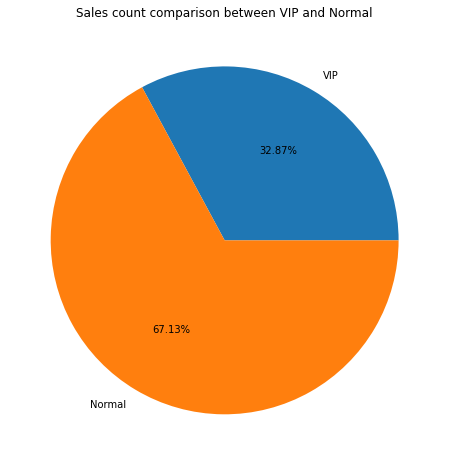

In [ ]:
# 총 물품 판매 대비 vip 물품 판매 비율
len(vip_df)/len(temp2) # 32.87%
vip_sales = len(vip_df)
normal_sales = len(temp2)-len(vip_df)

num_sales_df = pd.DataFrame([vip_sales, normal_sales], index=['VIP', 'Normal'])

plt.figure(figsize=(8, 8))
plt.pie(num_sales_df, labels=num_sales_df.index, autopct='%.2f%%')
plt.title('Sales count comparison between VIP and Normal')
plt.show()

### VIP 고객의 구매패턴 파악

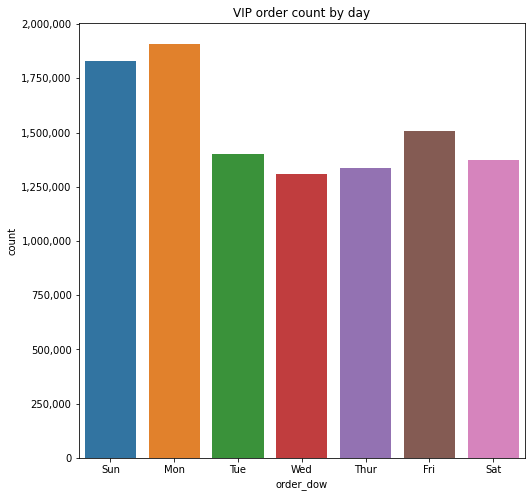

In [ ]:
# VIP by day
plt.figure(figsize=(8,8))
plt.title('VIP order count by day', fontsize=12)
sns.countplot(data=vip_df, x='order_dow')
plt.xticks(range(7), labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'])
cur_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.show()

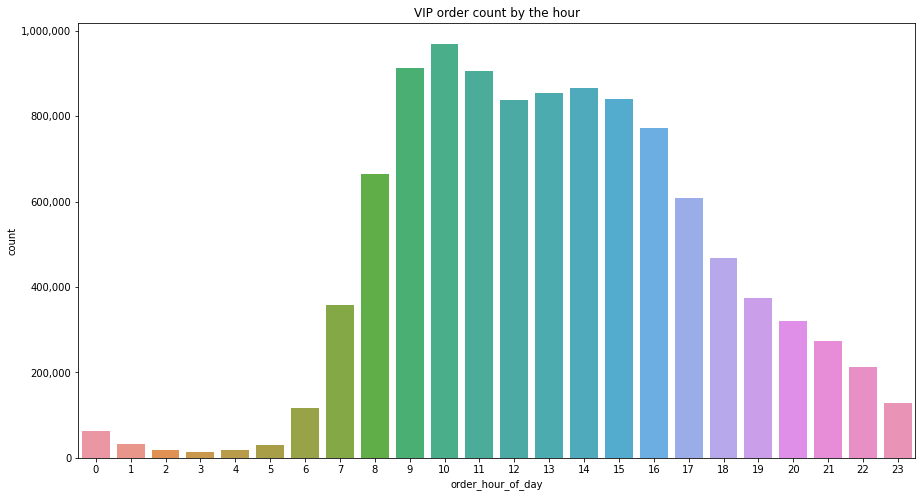

In [ ]:
# VIP by time
plt.figure(figsize=(15,8))
plt.title('VIP order count by the hour', fontsize=12)
sns.countplot(data=vip_df, x='order_hour_of_day')
cur_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.show()

In [ ]:
# hour & day pivot table
hod_dow_vip_pt = pd.pivot_table(vip_df, values='order_number', aggfunc='count', index=['order_dow'], columns=['order_hour_of_day'])
hod_dow_vip_pt

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,11305,5893,3174,2487,2430,3903,13095,51119,110254,144500,...,159283,151068,135986,104451,77846,64195,61475,53808,41587,23279
1,11238,5649,2921,2081,2561,5658,22195,70291,136569,201081,...,147507,137839,124022,92842,70131,54675,47269,39691,29593,17472
2,8570,3968,2367,1986,2149,4257,17510,47576,86363,125375,...,109343,107811,100281,80131,65808,51188,41705,34377,25906,15895
3,7522,3596,2096,1435,2215,4091,16164,44713,77780,106573,...,103310,104437,97243,80721,61928,48977,40390,34126,27482,15443
4,7239,3399,2201,1527,2278,3804,16962,46658,78015,105283,...,103790,102993,100909,82247,63358,53394,46195,40585,30979,18088
5,8734,3814,2661,2183,2885,5033,18922,51674,89416,125848,...,125447,124483,113196,89010,64992,51060,41827,34202,28043,17755
6,9438,5272,3323,2155,2796,3695,11668,45386,87053,104584,...,117044,112021,100273,79216,64087,51369,41695,37417,29876,20409


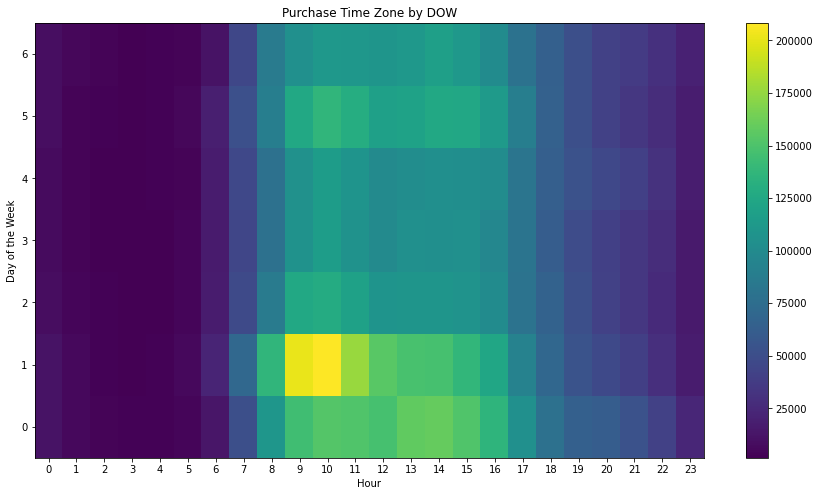

In [ ]:
# heatmap of VIP 
plt.figure(figsize=(15,8))
plt.pcolor(hod_dow_vip_pt)
plt.xticks(np.arange(0.5,len(hod_dow_pt.columns),1),hod_dow_pt.columns)
plt.yticks(np.arange(0.5,len(hod_dow_pt.index),1),hod_dow_pt.index)
plt.title('Purchase Time Zone by DOW')
plt.xlabel('Hour')
plt.ylabel('Day of the Week')
plt.colorbar()
plt.show()

VIP 고객의 구매가 잘 일어나는 시간대: 월요일 오전 9-11시로 확인

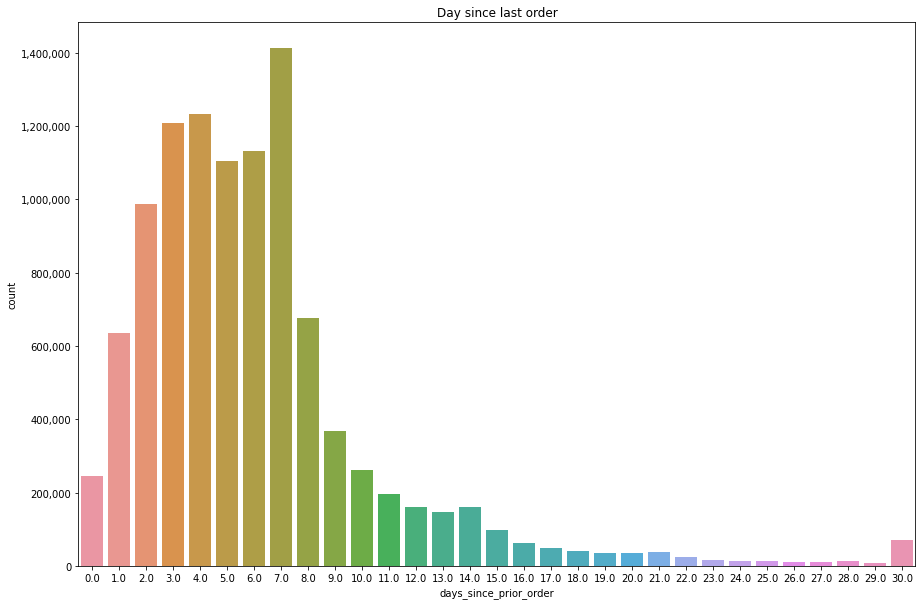

In [ ]:
# 재주문에 걸린 날짜
plt.figure(figsize=(15,10))
sns.countplot(data=vip_df, x='days_since_prior_order')
plt.title('Day since last order')
cur_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.show()

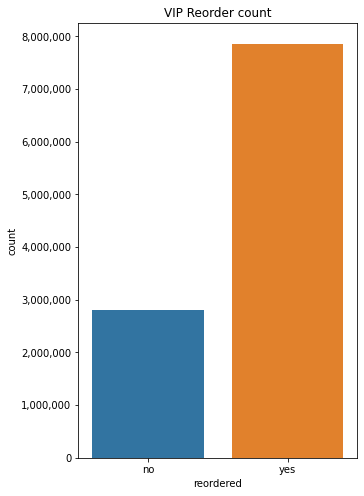

In [ ]:
# 재주문 수
plt.figure(figsize=(5,8))
sns.countplot(data=vip_df, x='reordered')
plt.title('VIP Reorder count')
plt.xticks([0, 1], labels=['no', 'yes'])
cur_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.show()

In [ ]:
# 대분류별 VIP 주문 수
vip_department = vip_df.groupby(['department']).count().sort_values(by='user_id', ascending=False)
vip_department

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
department,,,,,,,,,,,,,,
produce,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3258909,3198034
dairy eggs,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1897713,1862588
snacks,976348,976348,976348,976348,976348,976348,976348,976348,976348,976348,976348,976348,976348,957888
beverages,883529,883529,883529,883529,883529,883529,883529,883529,883529,883529,883529,883529,883529,867949
frozen,634065,634065,634065,634065,634065,634065,634065,634065,634065,634065,634065,634065,634065,621541
pantry,581605,581605,581605,581605,581605,581605,581605,581605,581605,581605,581605,581605,581605,570819
bakery,395133,395133,395133,395133,395133,395133,395133,395133,395133,395133,395133,395133,395133,387826
deli,335745,335745,335745,335745,335745,335745,335745,335745,335745,335745,335745,335745,335745,329169
canned goods,306328,306328,306328,306328,306328,306328,306328,306328,306328,306328,306328,306328,306328,300739


In [ ]:
# 대분류/재주문 별 VIP 주문 수
vip_df.groupby(['department', 'reordered']).count().sort_values(by=['department', 'user_id'], ascending=False)

user_id  order_id  product_id  add_to_cart_order  \
department      reordered                                                     
snacks          1           693573    693573      693573             693573   
                0           282775    282775      282775             282775   
produce         1          2579529   2579529     2579529            2579529   
                0           679380    679380      679380             679380   
pets            1            20130     20130       20130              20130   
                0             6485      6485        6485               6485   
personal care   0            69699     69699       69699              69699   
                1            58264     58264       58264              58264   
pantry          0           294722    294722      294722             294722   
                1           286883    286883      286883             286883   
other           1             6102      6102        6102               6102   
                0             4949      4949        4949               4949   
missing         1             9526      9526        9526               9526   
                0             9450      9450        9450               9450   
meat seafood    1           152061    152061      152061             152061   
                0            58881     58881       58881              58881   
international   1            41444     41444       41444              41444   
                0            39840     39840       39840              39840   
household       1           116606    116606      116606             116606   
                0            87520     87520       87520              87520   
frozen          1           436274    436274      436274             436274   
                0           197791    197791      197791             197791   
dry goods pasta 1           155199    155199      155199             155199   
                0            97190     97190       97190              97190   
deli            1           252628    252628      252628             252628   
                0            83117     83117       83117              83117   
dairy eggs      1          1540889   1540889     1540889            1540889   
                0           356824    356824      356824             356824   
canned goods    1           188572    188572      188572             188572   
                0           117756    117756      117756             117756   
bulk            1            10135     10135       10135              10135   
                0             4222      4222        4222               4222   
breakfast       1           164984    164984      164984             164984   
                0            66606     66606       66606              66606   
beverages       1           693983    693983      693983             693983   
                0           189546    189546      189546             189546   
bakery          1           306175    306175      306175             306175   
                0            88958     88958       88958              88958   
babies          1           121325    121325      121325             121325   
                0            51253     51253       51253              51253   
alcohol         1            29967     29967       29967              29967   
                0            10388     10388       10388              10388   

                           product_name  aisle_id  department_id    aisle  \
department      reordered                                                   
snacks          1                693573    693573         693573   693573   
                0                282775    282775         282775   282775   
produce         1               2579529   2579529        2579529  2579529   
                0                679380    679380         679380   679380   
pets            1                 20130     20130          20130    20130   
           

In [ ]:
# 대분류 VIP num stats
vip_department.describe()

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,5.076953e+05,4.982414e+05
std,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.715283e+05,7.571446e+05
min,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.105100e+04,1.086300e+04
25%,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,8.128400e+04,7.959800e+04
50%,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.315900e+05,2.270790e+05
75%,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.816050e+05,5.708190e+05
max,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.258909e+06,3.198034e+06


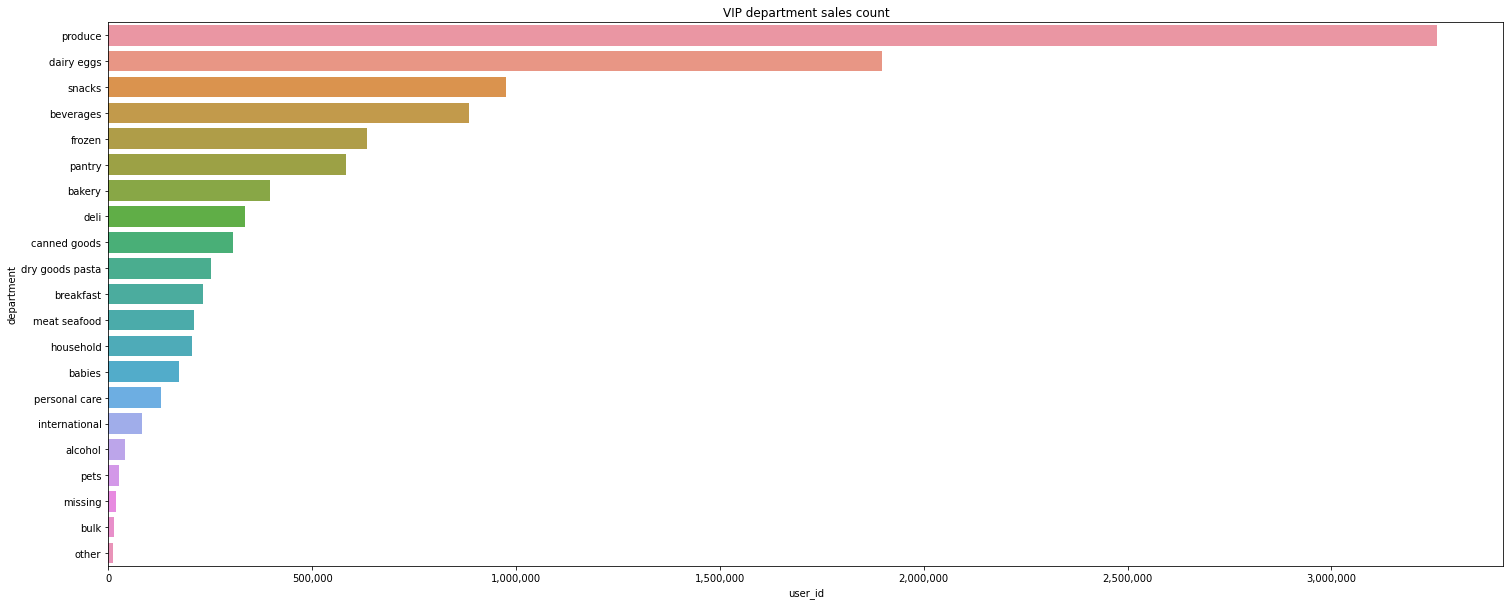

In [ ]:
# VIP 대분류별 주문 수 그래프
plt.figure(figsize=(25, 10))
ax1 = sns.barplot(data=vip_department, x='user_id', y=vip_department.index)
cur_vals = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.title('VIP department sales count', fontsize=12)
plt.show()

In [ ]:
# vip 대분류별 reorder 테이블
vip_data_prod = pd.DataFrame(vip_df['reordered'].groupby(vip_df['department']).count())
vip_data_prod.index = vip_data_prod.index.tolist()
vip_data_prod = vip_data_prod.reset_index()
vip_data_prod = vip_data_prod.rename(columns = {'index' : 'department'})
vip_data_prod = vip_data_prod.sort_values(by='reordered',ascending =False)
vip_data_prod

,department,reordered
19,produce,3258909
7,dairy eggs,1897713
20,snacks,976348
3,beverages,883529
10,frozen,634065
16,pantry,581605
2,bakery,395133
8,deli,335745
6,canned goods,306328
9,dry goods pasta,252389


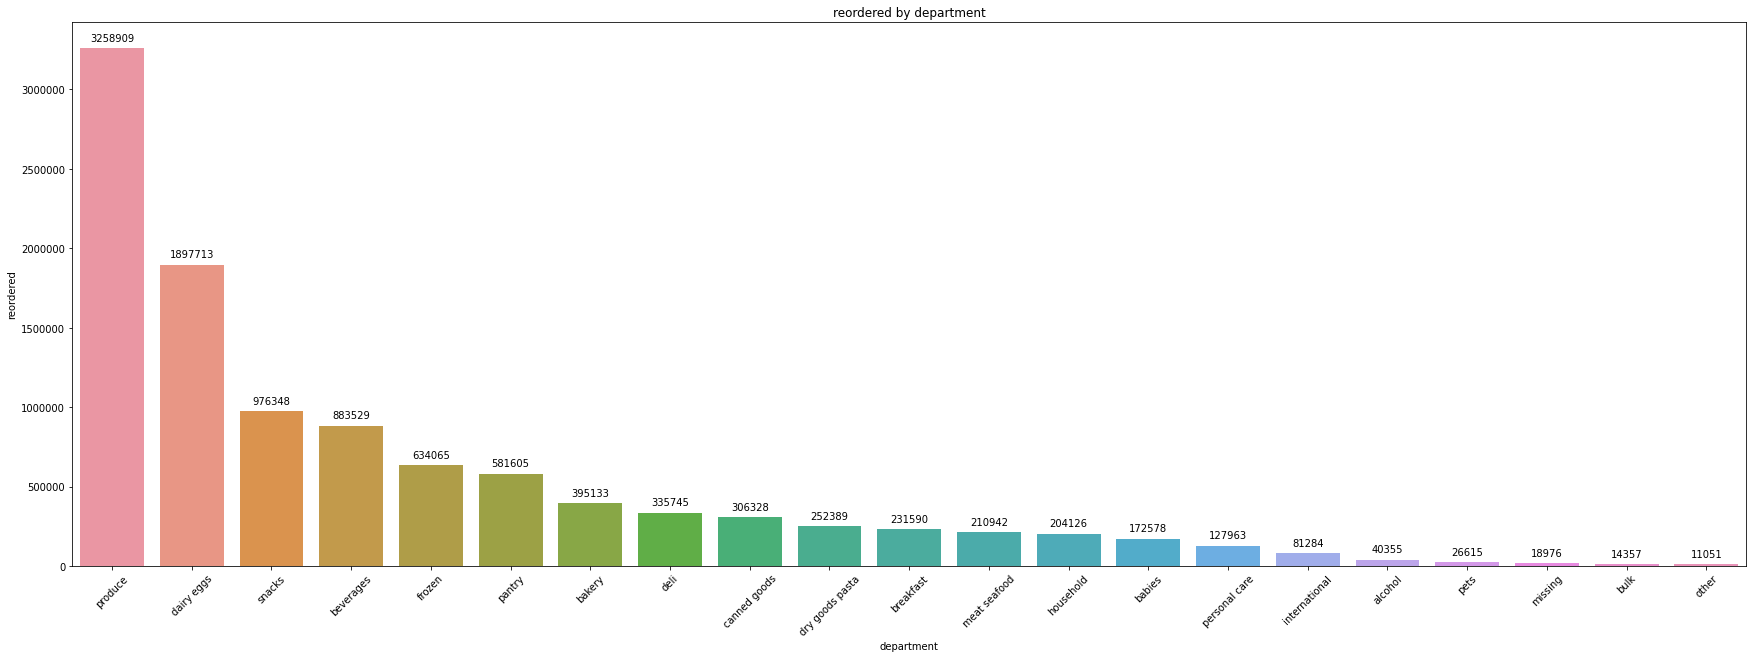

In [ ]:
# VIP고객들의 대분류별 재주문 수
plt.figure(figsize=(30,10))
ax = sns.barplot(data=vip_data_prod, x='department', y='reordered')
containers = ax.containers[0]

plt.ticklabel_format(axis='y',  style = 'plain')
for p in ax.patches:
  ax.annotate("%.0f" % p.get_height(),(p.get_x() + p.get_width()/2., p.get_height() - 0.3),
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 

plt.xticks(fontsize=10, rotation=45)

plt.title('reordered by department')
plt.show()

In [ ]:
# vip 소분류별 reorder 테이블
vip_data_prod = pd.DataFrame(vip_df['reordered'].groupby(vip_df['aisle']).count())
vip_data_prod = vip_data_prod.sort_values(by='reordered',ascending =False)
vip_data_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, fresh fruits to frozen juice
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   reordered  134 non-null    int64
dtypes: int64(1)
memory usage: 2.1+ KB


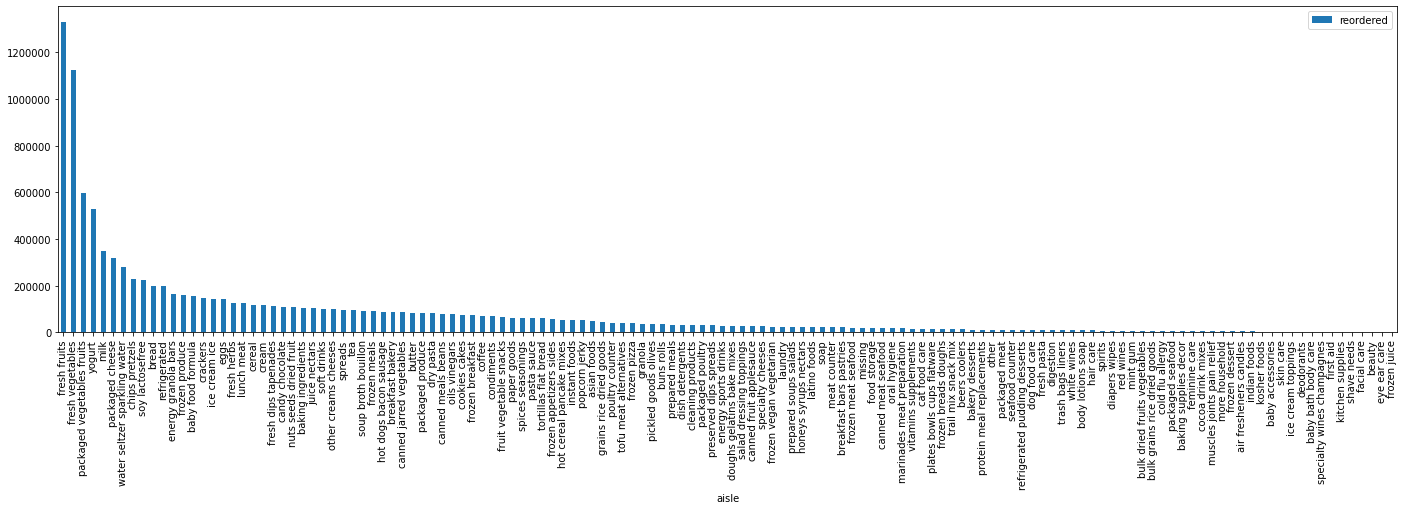

In [ ]:
# vip 소분류별 reorder 그래프
vip_data_prod.plot.bar(y='reordered',figsize=(24,6))
plt.ticklabel_format(axis='y',  style = 'plain')
plt.show()

In [ ]:
# 대분류별 VIP 주문 수 간단하게 보기
vip_department['user_id']

department
produce            3258909
dairy eggs         1897713
snacks              976348
beverages           883529
frozen              634065
pantry              581605
bakery              395133
deli                335745
canned goods        306328
dry goods pasta     252389
breakfast           231590
meat seafood        210942
household           204126
babies              172578
personal care       127963
international        81284
alcohol              40355
pets                 26615
missing              18976
bulk                 14357
other                11051
Name: user_id, dtype: int64

In [ ]:
# VIP 소분류별 주문 수
vip_aisle = vip_df.groupby(['aisle']).count().sort_values(by='user_id', ascending=False)
vip_aisle

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
aisle,,,,,,,,,,,,,,
fresh fruits,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1330846,1306082
fresh vegetables,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1122382,1101570
packaged vegetables fruits,596012,596012,596012,596012,596012,596012,596012,596012,596012,596012,596012,596012,596012,584712
yogurt,526731,526731,526731,526731,526731,526731,526731,526731,526731,526731,526731,526731,526731,516438
milk,346909,346909,346909,346909,346909,346909,346909,346909,346909,346909,346909,346909,346909,340608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shave needs,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2197,2168
facial care,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,2069,2023
beauty,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693,1693,1648


In [ ]:
# VIP 소분류별 주문 수 간편하게 보기
vip_aisle['user_id']

aisle
fresh fruits                  1330846
fresh vegetables              1122382
packaged vegetables fruits     596012
yogurt                         526731
milk                           346909
                               ...   
shave needs                      2197
facial care                      2069
beauty                           1693
eye ear care                     1606
frozen juice                     1155
Name: user_id, Length: 134, dtype: int64

In [ ]:
# VIP 소분류 탑 10
vip_aisle_top_10 = vip_aisle['user_id'].head(10)
vip_aisle_top_10 = vip_aisle_top_10.reset_index()

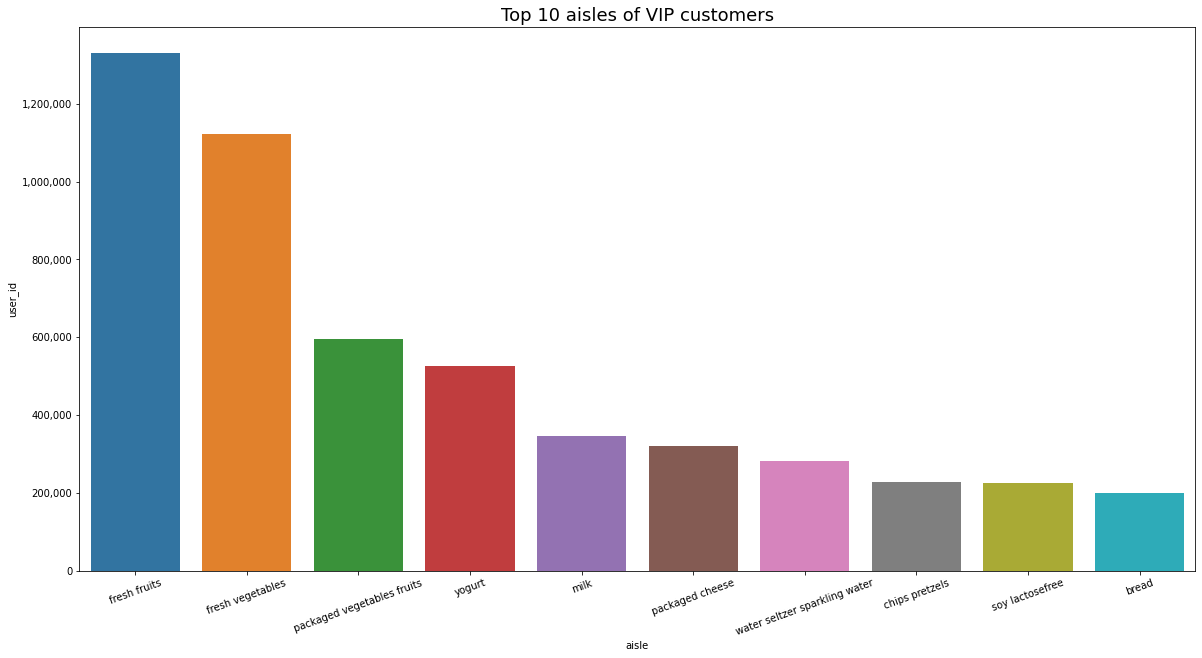

In [ ]:
# VIP 소분류 탑 10 그래프 화
plt.figure(figsize=(20, 10))
ax2 = sns.barplot(data=vip_aisle_top_10, x='aisle', y='user_id')
plt.title('Top 10 aisles of VIP customers', fontsize=18)
plt.xticks(rotation=20)
cur_vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.show()

In [ ]:
# VIP 재주문 수
vip_df['reordered'].value_counts()

1    7864249
0    2797352
Name: reordered, dtype: int64

In [ ]:
# 물품 수
len(vip_df['product_name'].unique())

44797

In [ ]:
# 품목, 소분류, 대분류 수
vip_product = vip_df[['product_name', 'aisle', 'department']].value_counts()
vip_product = vip_product.reset_index()
vip_product = vip_product.rename(columns={0:'count'})
vip_product

,product_name,aisle,department,count
0,Banana,fresh fruits,produce,160677
1,Bag of Organic Bananas,fresh fruits,produce,149211
2,Organic Strawberries,fresh fruits,produce,108353
3,Organic Hass Avocado,fresh fruits,produce,86868
4,Organic Baby Spinach,packaged vegetables fruits,produce,82506
...,...,...,...,...
44792,Black Raspberry Sparkling Water Beverage,juice nectars,beverages,1
44793,Italian Crushed Tomatoes,canned jarred vegetables,canned goods,1
44794,Black Raspberry Chocolate Frozen Dairy Dessert,ice cream ice,frozen,1
44795,Spanish Style Yellow Rice 3 Ct,instant foods,dry goods pasta,1


In [ ]:
# 탑 10 품목
vip_product_top_10 = vip_df[['product_name', 'aisle', 'department']].value_counts().head(10)
vip_product_top_10 = vip_product_top_10.reset_index()
# vip_product_top_10 = vip_product_top_10.set_index('product_name')
vip_product_top_10 = vip_product_top_10.rename(columns={0:'count'})
vip_product_top_10

,product_name,aisle,department,count
0,Banana,fresh fruits,produce,160677
1,Bag of Organic Bananas,fresh fruits,produce,149211
2,Organic Strawberries,fresh fruits,produce,108353
3,Organic Hass Avocado,fresh fruits,produce,86868
4,Organic Baby Spinach,packaged vegetables fruits,produce,82506
5,Organic Whole Milk,milk,dairy eggs,58069
6,Organic Raspberries,packaged vegetables fruits,produce,58041
7,Organic Avocado,fresh fruits,produce,52570
8,Limes,fresh fruits,produce,46910
9,Large Lemon,fresh fruits,produce,45821


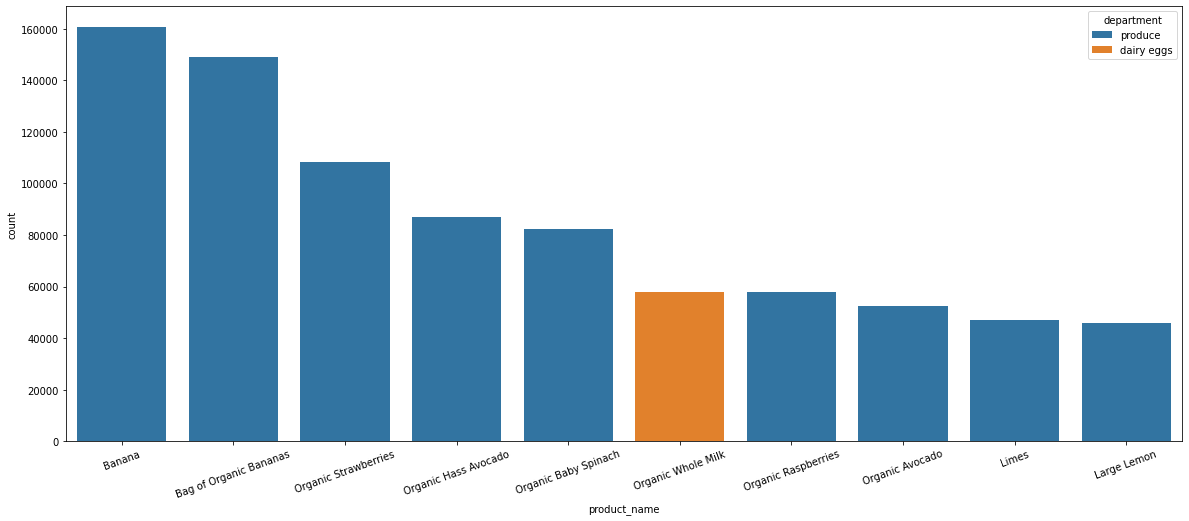

In [ ]:
# 탑 10 품목 그래프
plt.figure(figsize=(20,8))
sns.barplot(data=vip_product_top_10, x='product_name', y='count', hue='department', dodge=False)
plt.xticks(rotation=20)
plt.show()

VIP 고객들의 재주문 데이터를 살펴보면, <br>
이미 구매량이 높은 제품을 재구매하는 패턴을 보인다.
> 매출을 늘리기 위해서는 재주문이 적은 상품에 대한 전략이 필요할 것으로 보인다.

In [ ]:
# VIP 트리맵
import plotly.express as px
fig = px.treemap(vip_product, 
                 path=['department', 'aisle', 'product_name'], 
                 values='count'
                )
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# 제안사항: 
- VIP 고객이 많이 구매하는 시간대인 월요일 오전 9-11시
- 하위권 departments (재주문 기준) 상품들 대상으로
- VIP 대상 할인 쿠폰을 제공하는 것

## 참고) VIP 외 일반 고객 분석

In [ ]:
# VIP 아닌 고객 유저 id 별로 구분
order_number_normal2 = order_number_normal.reset_index()
order_number_normal2 = order_number_normal2['user_id']
order_number_normal2

0              1
1              2
2              3
3              4
4              5
           ...  
188302    206203
188303    206204
188304    206205
188305    206207
188306    206209
Name: user_id, Length: 188307, dtype: int64

In [ ]:
# 일반 고객 데이터셋
normal_df = pd.merge(left=order_number_normal2, right=temp2, how='left')
normal_df

,user_id,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,431534,196,1,1,Soda,77,7,soft drinks,beverages,prior,5,4,15,28.0
1,1,431534,12427,2,1,Original Beef Jerky,23,19,popcorn jerky,snacks,prior,5,4,15,28.0
2,1,431534,10258,3,1,Pistachios,117,19,nuts seeds dried fruit,snacks,prior,5,4,15,28.0
3,1,431534,25133,4,1,Organic String Cheese,21,16,packaged cheese,dairy eggs,prior,5,4,15,28.0
4,1,431534,10326,5,0,Organic Fuji Apples,24,4,fresh fruits,produce,prior,5,4,15,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21772883,206209,3154581,20842,11,0,Total 0% Greek Yogurt,120,16,yogurt,dairy eggs,prior,1,3,11,NaN
21772884,206209,3154581,23594,12,0,Medium Salsa,51,13,preserved dips spreads,pantry,prior,1,3,11,NaN
21772885,206209,3154581,25837,13,0,Mini Babybel Light Semisoft Edam Cheeses,21,16,packaged cheese,dairy eggs,prior,1,3,11,NaN
21772886,206209,3186442,14197,1,0,Tomato Paste,9,9,pasta sauce,dry goods pasta,prior,6,0,16,3.0


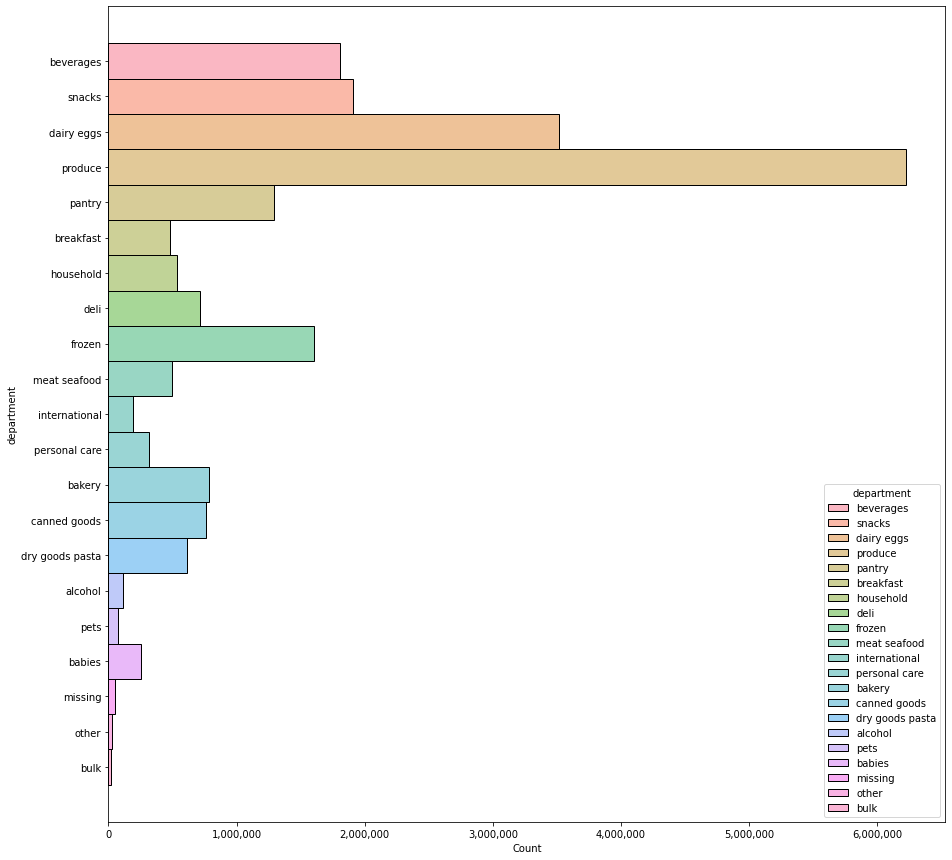

In [ ]:
# 일반 고객 대분류별 그래프
# 전체와 VIP 그래프를 따르고 다른 구매 성향을 띄지는 않는다
plt.figure(figsize=(15,15))
sns.histplot(data=normal_df, y='department', hue='department')
cur_vals = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in cur_vals])
plt.show()

In [ ]:
# 일반 고객 reorder 카운트
normal_df['reordered'].value_counts()

1    11262287
0    10510601
Name: reordered, dtype: int64

## +) add to cart 순위 / order number 순위와 비교해보자!

In [ ]:
temp2['add_to_cart_order'].max()    # 최대 145번째까지 있음
# 전체 고객데이터: 카트에 담긴 순서가, 많은 순서대로(대분류, 소분류)
# 카트에 담긴 순서 상위 1번째 ~ 10번째까지 담긴 상품들이 무엇인지 확인
cart_rank = temp2.sort_values(by = ['add_to_cart_order', 'department', 'aisle'])
cart_rank

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
112,13,17330,1,0,Light,27,5,beers coolers,alcohol,45082,prior,2,6,17,1.0
4256,446,28442,1,0,Coronita Beer Extra,27,5,beers coolers,alcohol,22274,prior,93,5,13,0.0
7424,770,45432,1,1,Brewmaster's Seasonal Sampler,27,5,beers coolers,alcohol,165709,prior,11,4,0,2.0
14322,1500,30736,1,1,Hard Cider Crisp Apple,27,5,beers coolers,alcohol,162652,prior,8,4,12,7.0
18788,1986,46088,1,0,Beer,27,5,beers coolers,alcohol,79780,prior,11,1,18,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14825326,1564244,46346,141,0,Sweet Potato Fries with Sea Salt,129,1,frozen appetizers sides,frozen,22906,prior,4,2,10,30.0
14825327,1564244,22594,142,0,Quattro Formaggi Four Cheeses Pizza,13,20,prepared meals,deli,22906,prior,4,2,10,30.0
14825328,1564244,21230,143,0,Organic Himalayan Pink Popcorn,23,19,popcorn jerky,snacks,22906,prior,4,2,10,30.0
14825329,1564244,43182,144,0,Almond Butter,3,19,energy granola bars,snacks,22906,prior,4,2,10,30.0


In [ ]:
cart_rank1 = cart_rank[cart_rank['add_to_cart_order']==1]
cart_rank1_dep = cart_rank1.groupby('department').count()
cart_rank1_dep.sort_values(by='order_id', ascending=False)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
department,,,,,,,,,,,,,,
produce,901240,901240,901240,901240,901240,901240,901240,901240,901240,901240,901240,901240,901240,845708
dairy eggs,650837,650837,650837,650837,650837,650837,650837,650837,650837,650837,650837,650837,650837,610783
beverages,409796,409796,409796,409796,409796,409796,409796,409796,409796,409796,409796,409796,409796,382831
snacks,225282,225282,225282,225282,225282,225282,225282,225282,225282,225282,225282,225282,225282,210625
frozen,182103,182103,182103,182103,182103,182103,182103,182103,182103,182103,182103,182103,182103,168972
pantry,154850,154850,154850,154850,154850,154850,154850,154850,154850,154850,154850,154850,154850,145610
bakery,117705,117705,117705,117705,117705,117705,117705,117705,117705,117705,117705,117705,117705,109959
deli,88297,88297,88297,88297,88297,88297,88297,88297,88297,88297,88297,88297,88297,82431
household,84805,84805,84805,84805,84805,84805,84805,84805,84805,84805,84805,84805,84805,78892


In [ ]:
cart_rank1_ai = cart_rank1.groupby('aisle').count()
cart_rank1_ai.sort_values(by='order_id', ascending=False)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
aisle,,,,,,,,,,,,,,
fresh fruits,445731,445731,445731,445731,445731,445731,445731,445731,445731,445731,445731,445731,445731,418611
fresh vegetables,237946,237946,237946,237946,237946,237946,237946,237946,237946,237946,237946,237946,237946,223127
milk,189435,189435,189435,189435,189435,189435,189435,189435,189435,189435,189435,189435,189435,178614
water seltzer sparkling water,160575,160575,160575,160575,160575,160575,160575,160575,160575,160575,160575,160575,160575,150280
packaged vegetables fruits,142252,142252,142252,142252,142252,142252,142252,142252,142252,142252,142252,142252,142252,133565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ice cream toppings,844,844,844,844,844,844,844,844,844,844,844,844,844,797
baby accessories,804,804,804,804,804,804,804,804,804,804,804,804,804,759
baby bath body care,794,794,794,794,794,794,794,794,794,794,794,794,794,751


우리 고객들은 카트에 담으면 그 물건들이 구매로 바로 이어지는 구매 패턴을 보이고 있다. <br>
(아마 식료품이라서? 사고자 하는 물건들을 바로 구입하는 것으로 보인다) <br>
카트상품과 실제 구매 상품이 별 차이가 나지 않기 때문에, 실제 구매가 높은 상품군들을 바탕으로 판매 전략을 짜는 것이 좋아보인다.